In [20]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras 

In [21]:
print(tf.__version__)

print(keras.__version__)

2.17.0
3.6.0


In [22]:
fashion_mnist = keras.datasets.fashion_mnist

In [23]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [24]:
# it showing that  every image is 28x28 array not a single 1d array of 784
X_train_full.shape

(60000, 28, 28)

In [25]:
# and it showes that every pixels is Integer(0-255) rather then floadt (0.0-255.0)
X_train_full.dtype

dtype('uint8')

In [26]:
# lets split the data into validation set also 
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid ,y_train= y_train_full[:5000],y_train_full[5000:]

In [27]:
# we divided the data into train ,validate and test 
print(X_valid.shape)
print(X_train.shape)
print(X_test.shape)

(5000, 28, 28)
(55000, 28, 28)
(10000, 28, 28)


In [28]:
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [29]:
class_name[y_train[1]]

'T-shirt/top'

In [30]:
### Create A Model Using Sequential API 

In [31]:
model = keras.models.Sequential()




In [32]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics =["accuracy"])

In [36]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.6860 - loss: 1.0045 - val_accuracy: 0.8090 - val_loss: 0.5411
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.8277 - loss: 0.5030 - val_accuracy: 0.8412 - val_loss: 0.4725
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.8440 - loss: 0.4480 - val_accuracy: 0.8542 - val_loss: 0.4268
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.8552 - loss: 0.4162 - val_accuracy: 0.8626 - val_loss: 0.3933
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.8581 - loss: 0.4024 - val_accuracy: 0.8690 - val_loss: 0.3768
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.8645 - loss: 0.3877 - val_accuracy: 0.8670 - val_loss: 0.3752
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.8708 - loss: 0.3690 - val_accuracy: 0.8674 - val_loss: 0.3856
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.8709 -

<function matplotlib.pyplot.show(close=None, block=None)>

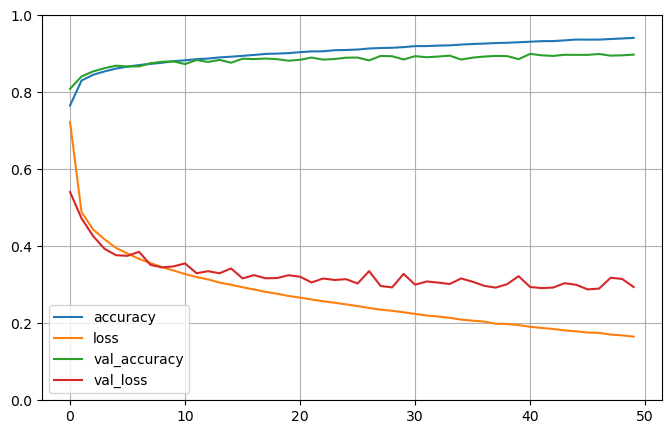

In [37]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [39]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.8582 - loss: 65.6989


[68.97052764892578, 0.853600025177002]

In [40]:
# using the model to make predictions 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
import numpy as np 


y_pred_prob = model.predict(X_new)

y_pred = np.argmax(y_pred_prob, axis=1)

class_names = np.array(class_name)  
y_pred_labels = class_names[y_pred]

print(y_pred_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
['Ankle boot' 'Pullover' 'Trouser']
